# Equalizzazione dell'istogramma - Notebook 2.3

Import delle librerie necessarie per la simulazione

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Import dati DICOM


In [5]:
I = imageio.v2.imread("../data/phantom_15.dcm")


## Equalizzazione dell'istogramma

N = 262144
N (non-zero) = 205578


/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_3205/2577431871.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  I = I - I.min()
/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_3205/2577431871.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mask = I > 0


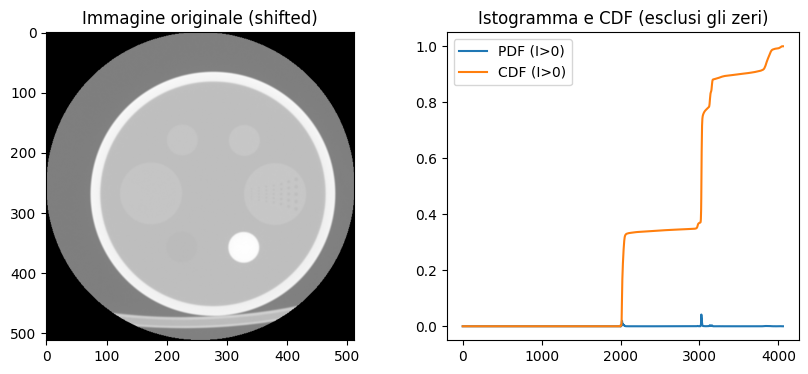

NameError: name 'Ieq' is not defined

In [ ]:
# (opzionale) se I può avere negativi, porta il minimo a 0
I = I - I.min()

# livelli (assumo immagine discreta intera)
p = int(I.max()) + 1
N = I.size
print("N =", N)

# --- escludo gli zeri prima di equalizzare ---
mask = I > 0
Nnz = int(mask.sum())
print("N (non-zero) =", Nnz)

# histogram SOLO sui pixel > 0
counts = np.bincount(I[mask].astype(np.int64), minlength=p)
counts[0] = 0

# CDF normalizzata
CDF = np.cumsum(counts)
CDF = CDF / CDF[-1]  # ora è in [0,1]

# visualizza (PDF e CDF)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(I, cmap="gray")
ax[0].set_title("Immagine originale (shifted)")

ax[1].plot(counts / counts.sum(), label="PDF (I>0)")
ax[1].plot(CDF, label="CDF (I>0)")
ax[1].set_title("Istogramma e CDF (esclusi gli zeri)")
ax[1].legend()
plt.show()

# LUT per equalizzazione
LUT = np.floor((p - 1) * CDF).astype(np.uint16)

# applico solo dove I>0
Ieq = np.zeros_like(I)
Ieq[mask] = LUT[I[mask].astype(np.int64)]

# histogram equalizzata 
counts_eq = np.bincount(Ieq[mask].astype(np.int64), minlength=p)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(Ieq, cmap="gray")
ax[0].set_title("Immagine equalizzata (solo I>0)")

ax[1].plot(counts_eq / counts_eq.sum())
ax[1].set_title("Istogramma equalizzato (solo I>0)")
plt.show()
